### Importing libraries and files for EDA

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 
import os
%matplotlib inline 
pd.pandas.set_option('display.max_columns', None)

#### Giving variable and importing dataset

In [2]:
kc = pd.read_csv('kc_house_data.csv') 

#### Initial analysis of data
*  The first view of the data requires cleaning and needs to be corrected as there are missing data and data types are miss matches 
* There are 21 columns over all  with RangeIndex rows : 21597 entries, 0 to 21596
* Date column & sqft_basement column are reflecting as object columns
* Waterfront, view & yr_renovated has null values

In [3]:
kc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


In [4]:
kc.head(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [5]:
kc.tail(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,3,8,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,3,8,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,3,7,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,0.0,3,8,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287
21596,1523300157,10/15/2014,325000.0,2,0.75,1020,1076,2.0,0.0,0.0,3,7,1020,0.0,2008,0.0,98144,47.5941,-122.299,1020,1357


In [6]:
kc.shape

(21597, 21)

In [7]:
kc.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


#### Finding null values

In [8]:
kc.isnull().sum() 

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

##### Observations:
* There are three columns with null values , waterfront , view, yr_renovated which needs to be filled
* The date columns needs to be converted to datetime stamp from object
* The yr_renovated column needs to be converted to float from string

#### heatmap for null values

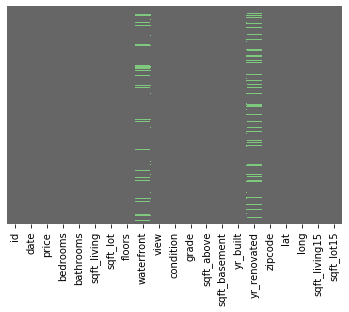

In [9]:
sns.heatmap(kc.isnull(),yticklabels=False,cbar=False,cmap='Accent_r')

#### Working on column view : 
**view** - Has been viewed

In [10]:
kc.view.nunique()   

5

In [11]:
kc['view'].value_counts() 

0.0    19422
2.0      957
3.0      508
1.0      330
4.0      317
Name: view, dtype: int64

#### Applying back fill method for replacing null values

In [12]:
kc['view'].fillna(method = 'bfill', inplace = True) 

In [13]:
kc.isnull().sum() 

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view                0
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [14]:
kc['view'].value_counts() 

0.0    19483
2.0      958
3.0      509
1.0      330
4.0      317
Name: view, dtype: int64

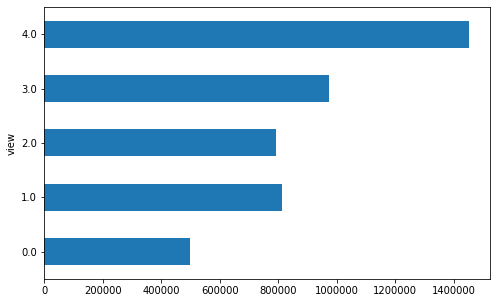

In [15]:
kc.groupby('view').mean()['price'].plot(kind = 'barh', figsize = (8, 5)) 

##### Observation: The sale price gets higher with more views

#### Working on column waterfront :
* waterfront - House which has a view to a waterfront

In [16]:
kc.waterfront.nunique()    

2

In [17]:
kc['waterfront'].value_counts() 

0.0    19075
1.0      146
Name: waterfront, dtype: int64

##### Applying Forward fill method for replacing null values

In [18]:
kc['waterfront'].fillna(method = 'ffill', inplace = True) 

# an alternative could have been replacing all the null values with 0 as the median of the column 
# kc['waterfront'].fillna(value=kc.waterfront.median())
# The column seem to have only two unique values - 
# 1 as the house with waterfront and 0 as the house without water front 
# Decided to use ffill method for filling null values

In [19]:
kc['waterfront'].value_counts() 

0.0    21438
1.0      158
Name: waterfront, dtype: int64

In [20]:
kc.isnull().sum() 

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront          1
view                0
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [21]:
kc[kc.waterfront.isnull()]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.0,1180,5650,1.0,NaN,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650


In [22]:
kc['waterfront'].fillna(method = 'bfill', inplace = True)    

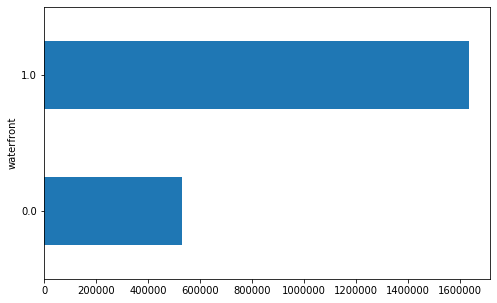

In [23]:
kc.groupby('waterfront').mean()['price'].plot(kind = 'barh', figsize = (8, 5)) 

##### Observation : The sale price of the house with water front is three times higher than those without water front

#### Working on column yr_renovated :
* yr_renovated - Year when house was renovated

In [24]:
kc[kc.yr_renovated.isnull()]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
12,114101516,5/28/2014,310000.0,3,1.00,1430,19901,1.5,0.0,0.0,4,7,1430,0.0,1927,NaN,98028,47.7558,-122.229,1780,12697
23,8091400200,5/16/2014,252700.0,2,1.50,1070,9643,1.0,0.0,0.0,3,7,1070,0.0,1985,NaN,98030,47.3533,-122.166,1220,8386
26,1794500383,6/26/2014,937000.0,3,1.75,2450,2691,2.0,0.0,0.0,3,8,1750,700.0,1915,NaN,98119,47.6386,-122.360,1760,3573
28,5101402488,6/24/2014,438000.0,3,1.75,1520,6380,1.0,0.0,0.0,3,7,790,730.0,1948,NaN,98115,47.6950,-122.304,1520,6235
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21576,1931300412,4/16/2015,475000.0,3,2.25,1190,1200,3.0,0.0,0.0,3,8,1190,0.0,2008,NaN,98103,47.6542,-122.346,1180,1224
21577,8672200110,3/17/2015,1090000.0,5,3.75,4170,8142,2.0,0.0,2.0,3,10,4170,0.0,2006,NaN,98056,47.5354,-122.181,3030,7980
21579,1972201967,10/31/2014,520000.0,2,2.25,1530,981,3.0,0.0,0.0,3,8,1480,50.0,2006,NaN,98103,47.6533,-122.346,1530,1282
21581,191100405,4/21/2015,1580000.0,4,3.25,3410,10125,2.0,0.0,0.0,3,10,3410,?,2007,NaN,98040,47.5653,-122.223,2290,10125


In [25]:
kc[kc.yr_renovated.isnull()].min() 

id                 3600072
date             1/12/2015
price                78000
bedrooms                 1
bathrooms              0.5
sqft_living            500
sqft_lot               635
floors                   1
waterfront               0
view                     0
condition                1
grade                    4
sqft_above             490
sqft_basement          0.0
yr_built              1900
yr_renovated          None
zipcode              98001
lat                47.1622
long              -122.511
sqft_living15          460
sqft_lot15             651
dtype: object

In [26]:
kc[kc.yr_renovated.isnull()].max() 

id               9900000190
date               9/9/2014
price              5.57e+06
bedrooms                  8
bathrooms              6.75
sqft_living            9200
sqft_lot             881654
floors                  3.5
waterfront                1
view                      4
condition                 5
grade                    13
sqft_above             8020
sqft_basement             ?
yr_built               2015
yr_renovated           None
zipcode               98199
lat                 47.7775
long               -121.315
sqft_living15          5790
sqft_lot15           392040
dtype: object

Text(0.5, 1.0, 'House price based on Year Renovated')

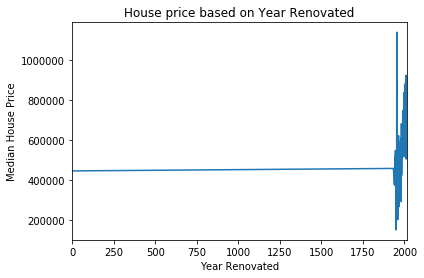

In [27]:
kc.groupby('yr_renovated')['price'].median().plot() 
plt.xlabel('Year Renovated')
plt.ylabel('Median House Price')
plt.title('House price based on Year Renovated') 

In [28]:
kc.yr_renovated.min() 

0.0

In [29]:
kc.yr_renovated.max() 

2015.0

In [30]:
kc['yr_renovated'].loc[lambda s: s > 1]  

1        1991.0
35       2002.0
95       1991.0
103      2010.0
125      1992.0
          ...  
19602    2004.0
20041    2006.0
20428    2009.0
20431    2014.0
20946    2007.0
Name: yr_renovated, Length: 744, dtype: float64

In [31]:
kc['yr_renovated'].loc[lambda s: s == 0] 

0        0.0
3        0.0
4        0.0
5        0.0
6        0.0
        ... 
21592    0.0
21593    0.0
21594    0.0
21595    0.0
21596    0.0
Name: yr_renovated, Length: 17011, dtype: float64

In [32]:
kc.loc[kc.yr_renovated == 0, 'yr_renovated'] = kc.yr_built.shift(-1)

In [33]:
kc.yr_renovated.min() 

1900.0

In [34]:
kc.yr_renovated.max() 

2015.0

In [35]:
kc['yr_renovated'].loc[lambda s: s == 0] 

Series([], Name: yr_renovated, dtype: float64)

Text(0.5, 1.0, 'House price based on Year Renovated')

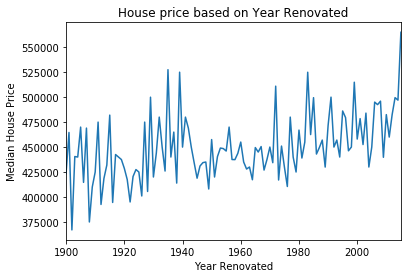

In [36]:
kc.groupby('yr_renovated')['price'].median().plot() 
plt.xlabel('Year Renovated')
plt.ylabel('Median House Price')
plt.title('House price based on Year Renovated') 

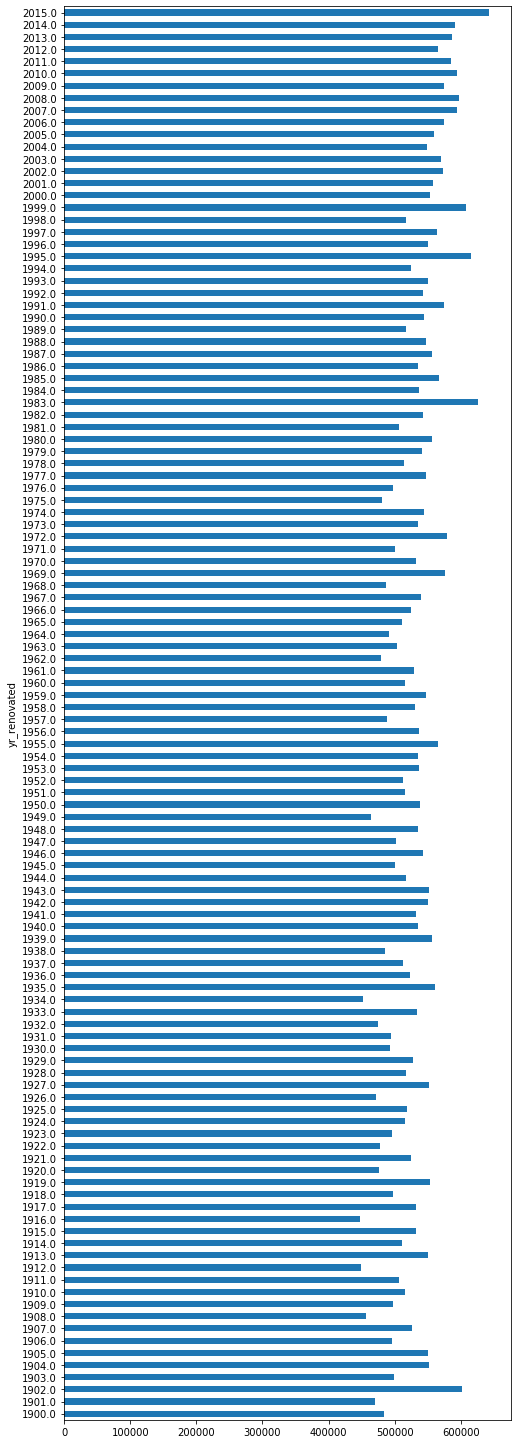

In [37]:
kc.groupby('yr_renovated').mean()['price'].plot(kind = 'barh', figsize = (8, 26)) 

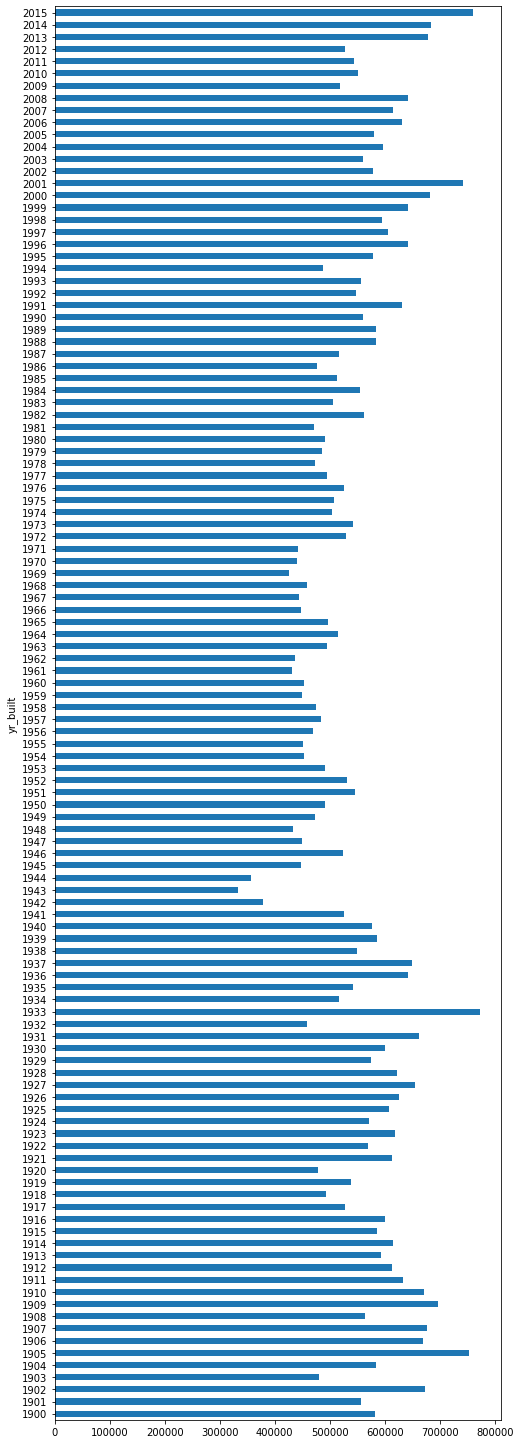

In [38]:
kc.groupby('yr_built').mean()['price'].plot(kind = 'barh', figsize = (8, 26)) 

Text(0.5, 1.0, 'Renovated_price')

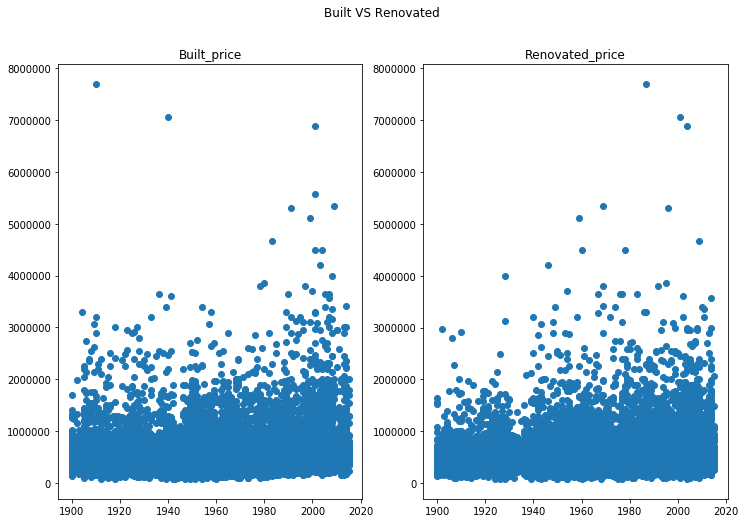

In [39]:
fig = plt.figure(figsize = (12, 8))
fig.suptitle('Built VS Renovated')

axl = plt.subplot(1, 2, 1)
plt.scatter(kc['yr_built'], kc['price'])
axl.set_title('Built_price')

ax2 = plt.subplot(1, 2, 2) # just changed name of axis from ax1 to ax2 and plt number from 1 to 2
plt.scatter(kc['yr_renovated'], kc['price'])
ax2.set_title('Renovated_price')

In [40]:
kc['yr_renovated'].fillna(kc['yr_built'],inplace = True) 

##### Filling the null value of yr_renovated with year yr_built based on the assumption the property was sold in as is condition

##### Confirming zero null value

In [41]:
kc.isnull().sum() 

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

### Checking data types and post clearing null values

In [42]:
kc.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront       float64
view             float64
condition          int64
grade              int64
sqft_above         int64
sqft_basement     object
yr_built           int64
yr_renovated     float64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

#####  Converting date from object to datetime stamp 

In [43]:
kc['date']= pd.to_datetime(kc['date']) 

In [44]:
kc.dtypes

id                        int64
date             datetime64[ns]
price                   float64
bedrooms                  int64
bathrooms               float64
sqft_living               int64
sqft_lot                  int64
floors                  float64
waterfront              float64
view                    float64
condition                 int64
grade                     int64
sqft_above                int64
sqft_basement            object
yr_built                  int64
yr_renovated            float64
zipcode                   int64
lat                     float64
long                    float64
sqft_living15             int64
sqft_lot15                int64
dtype: object

In [45]:
kc['date'].max()  

Timestamp('2015-05-27 00:00:00')

In [46]:
kc['date'].min()   

Timestamp('2014-05-02 00:00:00')

In [47]:
kc['date'].nunique()

372

##### Observation: The property has been sold between 2nd May 2014 & 27th may 2015

#### Adding Year, Month & Day columns

In [48]:
kc['year'] = kc['date'].dt.year
kc['month'] = kc['date'].dt.month
kc['day'] = kc['date'].dt.day

In [49]:
kc.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month,day
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3,7,1180,0.0,1955,1951.0,98178,47.5112,-122.257,1340,5650,2014,10,13
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,2014,12,9
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,1933.0,98028,47.7379,-122.233,2720,8062,2015,2,25
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,1987.0,98136,47.5208,-122.393,1360,5000,2014,12,9
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,2001.0,98074,47.6168,-122.045,1800,7503,2015,2,18


#### Dropping date column as it remains in Datetime & object format

In [50]:
kc = kc.drop(columns=['date'])

#### Adding column age of house and age of renovation

In [51]:
kc['yr_age_of_house'] = kc['year'] - kc['yr_built']

In [52]:
kc['yr_age_of_renovation'] = kc['yr_renovated'] - kc['yr_built']

In [53]:
kc.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month,day,yr_age_of_house,yr_age_of_renovation
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3,7,1180,0.0,1955,1951.0,98178,47.5112,-122.257,1340,5650,2014,10,13,59,-4.0
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,2014,12,9,63,40.0
2,5631500400,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,1933.0,98028,47.7379,-122.233,2720,8062,2015,2,25,82,0.0
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,1987.0,98136,47.5208,-122.393,1360,5000,2014,12,9,49,22.0
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,2001.0,98074,47.6168,-122.045,1800,7503,2015,2,18,28,14.0


#### Converting the string in sqft_basement to float using astype from object 

In [54]:
kc['sqft_basement']=kc['sqft_basement'].astype(str).str.replace('?','0').astype(float)
# The main reason the sqft_basement being a object was a '?' - alternate was to drop the only row with '?'
# kc = kc[kc.sqft_basement != '?'] 

##### Checking the price column for converting into decimal

In [55]:
kc['price'].min()   

78000.0

In [56]:
kc['price'].max()   

7700000.0

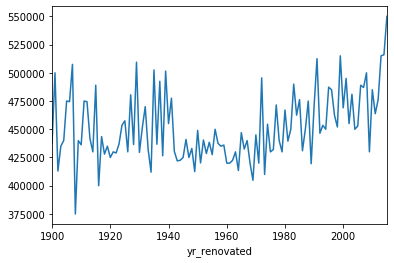

In [57]:
kc.groupby('yr_renovated')['price'].median().plot() 

In [58]:
kc.sort_values(by='price', ascending=False)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month,day,yr_age_of_house,yr_age_of_renovation
7245,6762700020,7700000.0,6,8.00,12050,27600,2.5,0.0,3.0,4,13,8570,3480.0,1910,1987.0,98102,47.6298,-122.323,3940,8800,2014,10,13,104,77.0
3910,9808700762,7060000.0,5,4.50,10040,37325,2.0,1.0,2.0,3,11,7680,2360.0,1940,2001.0,98004,47.6500,-122.214,3930,25449,2014,6,11,74,61.0
9245,9208900037,6890000.0,6,7.75,9890,31374,2.0,0.0,4.0,3,13,8860,1030.0,2001,2004.0,98039,47.6305,-122.240,4540,42730,2014,9,19,13,3.0
4407,2470100110,5570000.0,5,5.75,9200,35069,2.0,0.0,0.0,3,13,6200,3000.0,2001,2001.0,98039,47.6289,-122.233,3560,24345,2014,8,4,13,0.0
1446,8907500070,5350000.0,5,5.00,8000,23985,2.0,0.0,4.0,3,12,6720,1280.0,2009,1969.0,98004,47.6232,-122.220,4600,21750,2015,4,13,6,-40.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2139,1623049041,82500.0,2,1.00,520,22334,1.0,0.0,0.0,2,5,520,0.0,1951,2004.0,98168,47.4799,-122.296,1572,10570,2014,5,8,63,53.0
8267,3883800011,82000.0,3,1.00,860,10426,1.0,0.0,0.0,3,6,860,0.0,1954,1954.0,98146,47.4987,-122.341,1140,11250,2014,11,5,60,0.0
16184,3028200080,81000.0,2,1.00,730,9975,1.0,0.0,0.0,1,5,730,0.0,1943,1950.0,98168,47.4808,-122.315,860,9000,2015,3,24,72,7.0
465,8658300340,80000.0,1,0.75,430,5050,1.0,0.0,0.0,2,4,430,0.0,1912,1954.0,98014,47.6499,-121.909,1200,7500,2014,5,23,102,42.0


In [59]:
kc.sort_values(by='price', ascending=True) 

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month,day,yr_age_of_house,yr_age_of_renovation
15279,40000362,78000.0,2,1.00,780,16344,1.0,0.0,0.0,1,5,780,0.0,1942,1942.0,98168,47.4739,-122.280,1700,10387,2014,5,6,72,0.0
465,8658300340,80000.0,1,0.75,430,5050,1.0,0.0,0.0,2,4,430,0.0,1912,1954.0,98014,47.6499,-121.909,1200,7500,2014,5,23,102,42.0
16184,3028200080,81000.0,2,1.00,730,9975,1.0,0.0,0.0,1,5,730,0.0,1943,1950.0,98168,47.4808,-122.315,860,9000,2015,3,24,72,7.0
8267,3883800011,82000.0,3,1.00,860,10426,1.0,0.0,0.0,3,6,860,0.0,1954,1954.0,98146,47.4987,-122.341,1140,11250,2014,11,5,60,0.0
2139,1623049041,82500.0,2,1.00,520,22334,1.0,0.0,0.0,2,5,520,0.0,1951,2004.0,98168,47.4799,-122.296,1572,10570,2014,5,8,63,53.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1446,8907500070,5350000.0,5,5.00,8000,23985,2.0,0.0,4.0,3,12,6720,1280.0,2009,1969.0,98004,47.6232,-122.220,4600,21750,2015,4,13,6,-40.0
4407,2470100110,5570000.0,5,5.75,9200,35069,2.0,0.0,0.0,3,13,6200,3000.0,2001,2001.0,98039,47.6289,-122.233,3560,24345,2014,8,4,13,0.0
9245,9208900037,6890000.0,6,7.75,9890,31374,2.0,0.0,4.0,3,13,8860,1030.0,2001,2004.0,98039,47.6305,-122.240,4540,42730,2014,9,19,13,3.0
3910,9808700762,7060000.0,5,4.50,10040,37325,2.0,1.0,2.0,3,11,7680,2360.0,1940,2001.0,98004,47.6500,-122.214,3930,25449,2014,6,11,74,61.0


#### Using ticker to convert large values 

In [60]:
import matplotlib.ticker as tick

In [61]:
sns.set(font_scale=1.4)

def reformat_large_tick_values(tick_val, pos):
    
    if tick_val >= 1000000:
        val = round(tick_val/1000000, 1)
        new_tick_format = '{:}M'.format(val)
    elif tick_val >= 1000:
        val = round(tick_val/1000, 1)
        new_tick_format = '{:}K'.format(val)
    elif tick_val < 1000:
        new_tick_format = round(tick_val, 1)
    else:
        new_tick_format = tick_val

    # make new_tick_format into a string value
    new_tick_format = str(new_tick_format)
    
    # code below will keep 4.5M as is but change values such as 4.0M to 4M since that zero after the decimal isn't needed
    index_of_decimal = new_tick_format.find(".")
    
    if index_of_decimal != -1:
        value_after_decimal = new_tick_format[index_of_decimal+1]
        if value_after_decimal == "0":
            # remove the 0 after the decimal point since it's not needed
            new_tick_format = new_tick_format[0:index_of_decimal] + new_tick_format[index_of_decimal+2:]
            
    return new_tick_format

In [62]:
kc['price_in_millions'] = kc['price']/1000000

In [63]:
kc.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month,day,yr_age_of_house,yr_age_of_renovation,price_in_millions
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3,7,1180,0.0,1955,1951.0,98178,47.5112,-122.257,1340,5650,2014,10,13,59,-4.0,0.2219
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,2014,12,9,63,40.0,0.5380
2,5631500400,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,1933.0,98028,47.7379,-122.233,2720,8062,2015,2,25,82,0.0,0.1800
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,1987.0,98136,47.5208,-122.393,1360,5000,2014,12,9,49,22.0,0.6040
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,2001.0,98074,47.6168,-122.045,1800,7503,2015,2,18,28,14.0,0.5100


In [64]:
kc.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 26 columns):
id                      21597 non-null int64
price                   21597 non-null float64
bedrooms                21597 non-null int64
bathrooms               21597 non-null float64
sqft_living             21597 non-null int64
sqft_lot                21597 non-null int64
floors                  21597 non-null float64
waterfront              21597 non-null float64
view                    21597 non-null float64
condition               21597 non-null int64
grade                   21597 non-null int64
sqft_above              21597 non-null int64
sqft_basement           21597 non-null float64
yr_built                21597 non-null int64
yr_renovated            21597 non-null float64
zipcode                 21597 non-null int64
lat                     21597 non-null float64
long                    21597 non-null float64
sqft_living15           21597 non-null int64
sqft_lot15        

In [65]:
kc.describe() 

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month,day,yr_age_of_house,yr_age_of_renovation,price_in_millions
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007316,0.233412,3.409825,7.657915,1788.596842,285.716581,1970.999676,1972.031717,98077.951845,47.560093,-122.213982,1986.620318,12758.283512,2014.322962,6.573969,15.687457,43.323286,1.032041,0.540297
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.085221,0.764995,0.650546,1.173200,827.759761,439.819830,29.375234,29.308600,53.513072,0.138552,0.140724,685.230472,27274.441950,0.467619,3.115061,8.634890,29.377285,34.812130,0.367368
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,1900.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,2014.000000,1.000000,1.000000,-1.000000,-113.000000,0.078000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,1952.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000,2014.000000,4.000000,8.000000,18.000000,-16.000000,0.322000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,1976.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000,2014.000000,6.000000,16.000000,40.000000,0.000000,0.450000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,550.000000,1997.000000,1998.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000,2015.000000,9.000000,23.000000,63.000000,19.000000,0.645000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,2015.000000,12.000000,31.000000,115.000000,114.000000,7.700000


In [66]:
kc['price_in_millions'].min() 

0.078

In [67]:
kc['price_in_millions'].max() 

7.7

In [68]:
kc.nunique() 

id                      21420
price                    3622
bedrooms                   12
bathrooms                  29
sqft_living              1034
sqft_lot                 9776
floors                      6
waterfront                  2
view                        5
condition                   5
grade                      11
sqft_above                942
sqft_basement             303
yr_built                  116
yr_renovated              116
zipcode                    70
lat                      5033
long                      751
sqft_living15             777
sqft_lot15               8682
year                        2
month                      12
day                        31
yr_age_of_house           117
yr_age_of_renovation      223
price_in_millions        3622
dtype: int64

#### Confirming all dtypes converted to int & float

In [69]:
kc.dtypes

id                        int64
price                   float64
bedrooms                  int64
bathrooms               float64
sqft_living               int64
sqft_lot                  int64
floors                  float64
waterfront              float64
view                    float64
condition                 int64
grade                     int64
sqft_above                int64
sqft_basement           float64
yr_built                  int64
yr_renovated            float64
zipcode                   int64
lat                     float64
long                    float64
sqft_living15             int64
sqft_lot15                int64
year                      int64
month                     int64
day                       int64
yr_age_of_house           int64
yr_age_of_renovation    float64
price_in_millions       float64
dtype: object

In [70]:
kc.isnull().sum() 

id                      0
price                   0
bedrooms                0
bathrooms               0
sqft_living             0
sqft_lot                0
floors                  0
waterfront              0
view                    0
condition               0
grade                   0
sqft_above              0
sqft_basement           0
yr_built                0
yr_renovated            0
zipcode                 0
lat                     0
long                    0
sqft_living15           0
sqft_lot15              0
year                    0
month                   0
day                     0
yr_age_of_house         0
yr_age_of_renovation    0
price_in_millions       0
dtype: int64

In [71]:
kc.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 26 columns):
id                      21597 non-null int64
price                   21597 non-null float64
bedrooms                21597 non-null int64
bathrooms               21597 non-null float64
sqft_living             21597 non-null int64
sqft_lot                21597 non-null int64
floors                  21597 non-null float64
waterfront              21597 non-null float64
view                    21597 non-null float64
condition               21597 non-null int64
grade                   21597 non-null int64
sqft_above              21597 non-null int64
sqft_basement           21597 non-null float64
yr_built                21597 non-null int64
yr_renovated            21597 non-null float64
zipcode                 21597 non-null int64
lat                     21597 non-null float64
long                    21597 non-null float64
sqft_living15           21597 non-null int64
sqft_lot15        

In [72]:
kc.describe() 

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month,day,yr_age_of_house,yr_age_of_renovation,price_in_millions
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007316,0.233412,3.409825,7.657915,1788.596842,285.716581,1970.999676,1972.031717,98077.951845,47.560093,-122.213982,1986.620318,12758.283512,2014.322962,6.573969,15.687457,43.323286,1.032041,0.540297
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.085221,0.764995,0.650546,1.173200,827.759761,439.819830,29.375234,29.308600,53.513072,0.138552,0.140724,685.230472,27274.441950,0.467619,3.115061,8.634890,29.377285,34.812130,0.367368
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,1900.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,2014.000000,1.000000,1.000000,-1.000000,-113.000000,0.078000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,1952.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000,2014.000000,4.000000,8.000000,18.000000,-16.000000,0.322000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,1976.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000,2014.000000,6.000000,16.000000,40.000000,0.000000,0.450000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,550.000000,1997.000000,1998.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000,2015.000000,9.000000,23.000000,63.000000,19.000000,0.645000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,2015.000000,12.000000,31.000000,115.000000,114.000000,7.700000


#### Converting minus age of renovation figures to Zero

In [73]:
kc['yr_age_of_renovation'] = kc['yr_age_of_renovation'].clip(lower=0)

In [74]:
kc['yr_age_of_renovation'].min() 

0.0

In [75]:
kc['yr_age_of_renovation'].max() 

114.0

Text(0.5, 1.0, 'Age of Renovation')

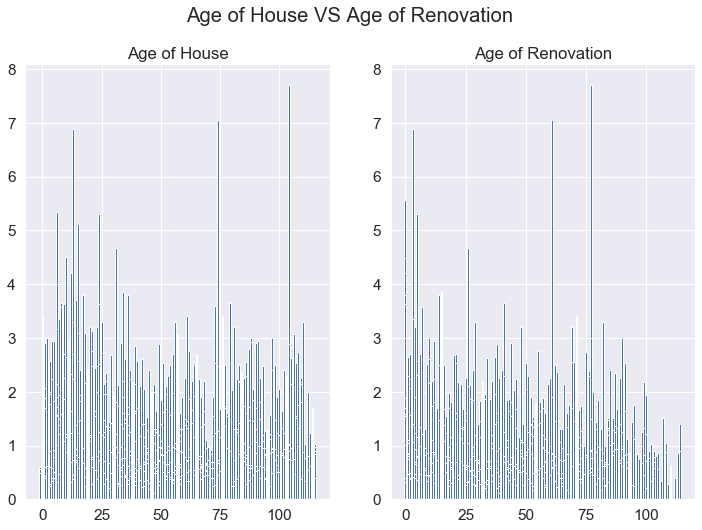

In [76]:
fig = plt.figure(figsize = (12, 8))
fig.suptitle('Age of House VS Age of Renovation')

axl = plt.subplot(1, 2, 1)
plt.bar(kc['yr_age_of_house'], kc['price_in_millions'])
axl.set_title('Age of House')

ax2 = plt.subplot(1, 2, 2) # just changed name of axis from ax1 to ax2 and plt number from 1 to 2
plt.bar(kc['yr_age_of_renovation'], kc['price_in_millions'])
ax2.set_title('Age of Renovation')  

Text(0.5, 1.0, 'Price in Millions v. Year Built')

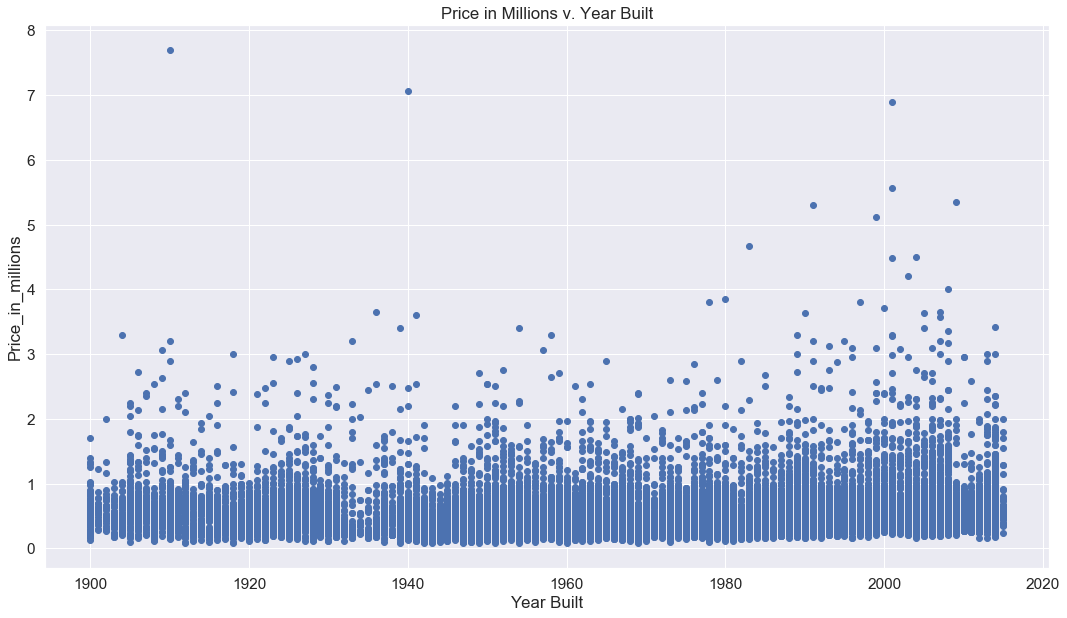

In [78]:
plt.figure(figsize=(18,10))

plt.scatter(kc['yr_built'],kc['price_in_millions'])
plt.xlabel("Year Built")
plt.ylabel("Price_in_millions")
plt.title("Price in Millions v. Year Built")

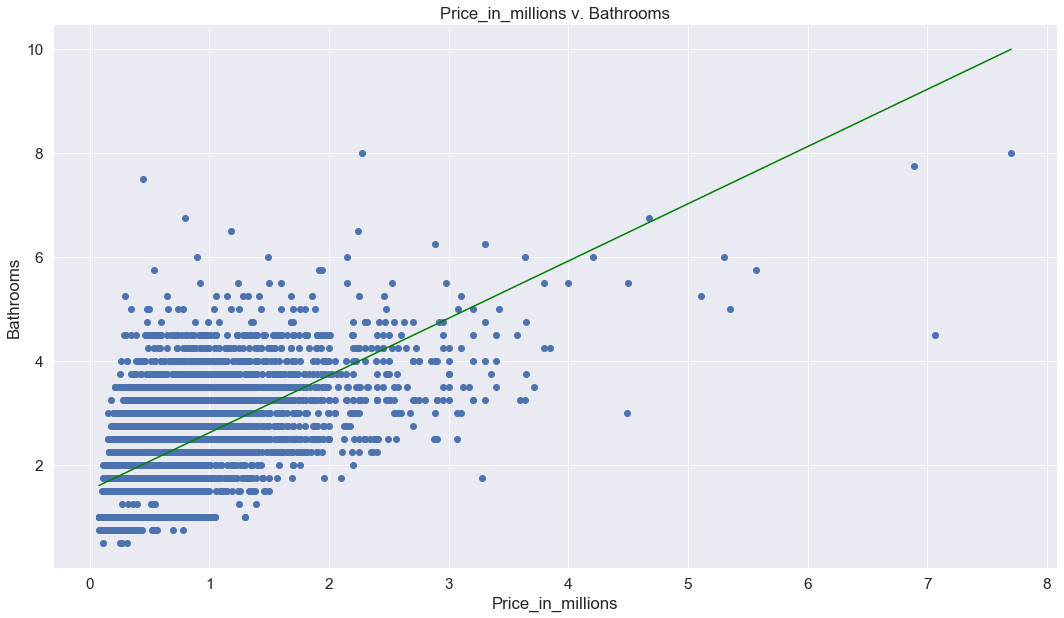

In [79]:
plt.figure(figsize=(18,10))
plt.title("Price_in_millions v. Bathrooms")

plt.scatter(kc['price_in_millions'],kc['bathrooms'])
plt.ylabel("Bathrooms")
plt.xlabel("Price_in_millions")
plt.plot(np.unique(kc['price_in_millions']), np.poly1d(np.polyfit(kc['price_in_millions'], kc['bathrooms'], 1))(np.unique(kc['price_in_millions'])), color='green') #line of best fit

Text(0, 0.5, 'Price in Millions')

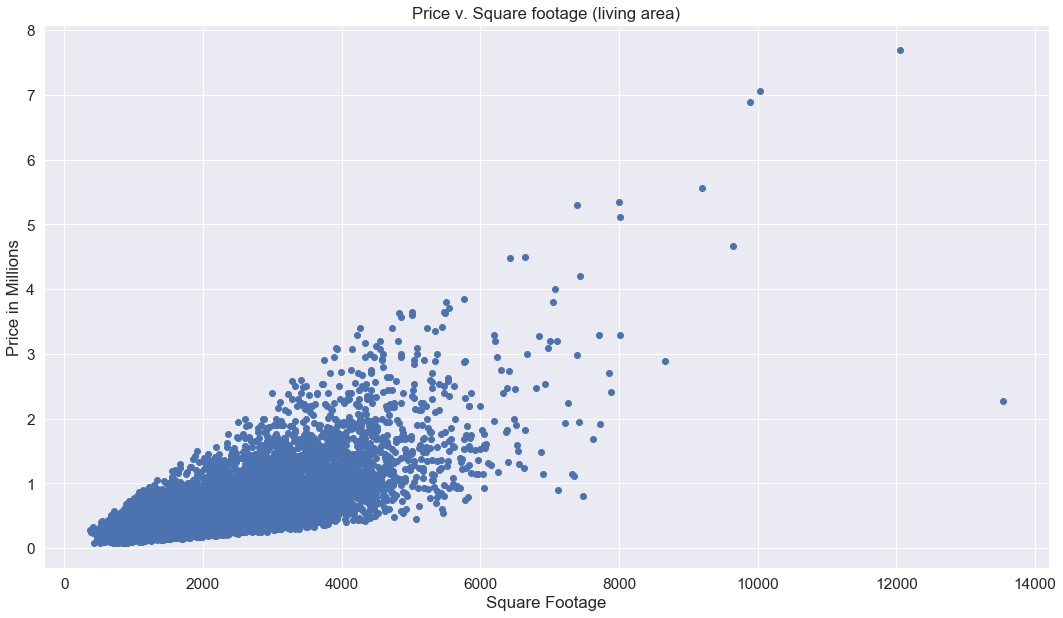

In [82]:
plt.figure(figsize=(18,10))

plt.scatter(kc['sqft_living'],kc['price_in_millions'])
plt.title('Price v. Square footage (living area)')
plt.xlabel('Square Footage')
plt.ylabel("Price in Millions")

Text(0.5, 1.0, 'Price In Millions v. Grade')

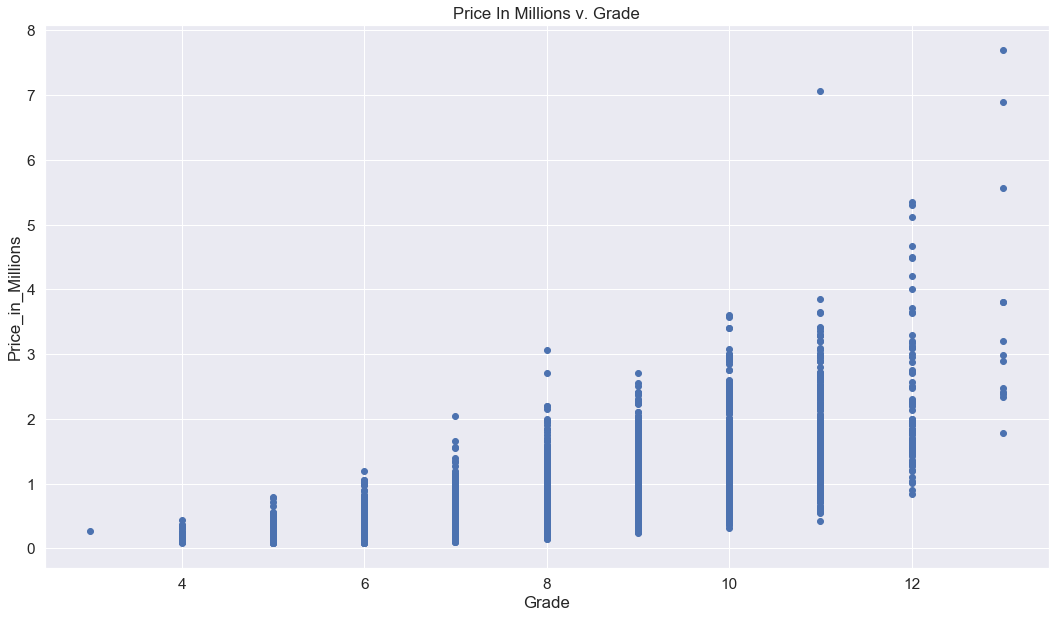

In [83]:
plt.figure(figsize=(18,10))

plt.scatter(kc['grade'],kc['price_in_millions'])
plt.xlabel("Grade")
plt.ylabel("Price_in_Millions")
plt.title("Price In Millions v. Grade")

Text(0.5, 1.0, 'Bedrooms v. Price in Millions')

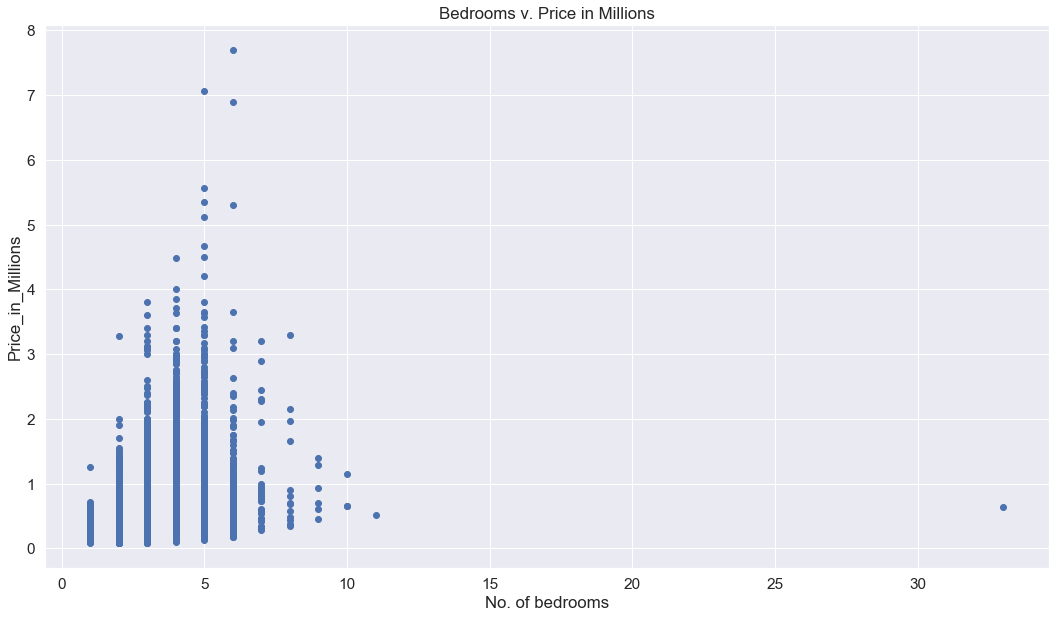

In [84]:
plt.figure(figsize=(18,10))

plt.scatter(kc['bedrooms'],kc['price_in_millions'])
plt.ylabel('Price_in_Millions')
plt.xlabel('No. of bedrooms')
plt.title('Bedrooms v. Price in Millions') 

C:\Users\DELL\anaconda3\envs\learn-env\lib\site-packages\seaborn\axisgrid.py:2262: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

<Figure size 1296x720 with 0 Axes>

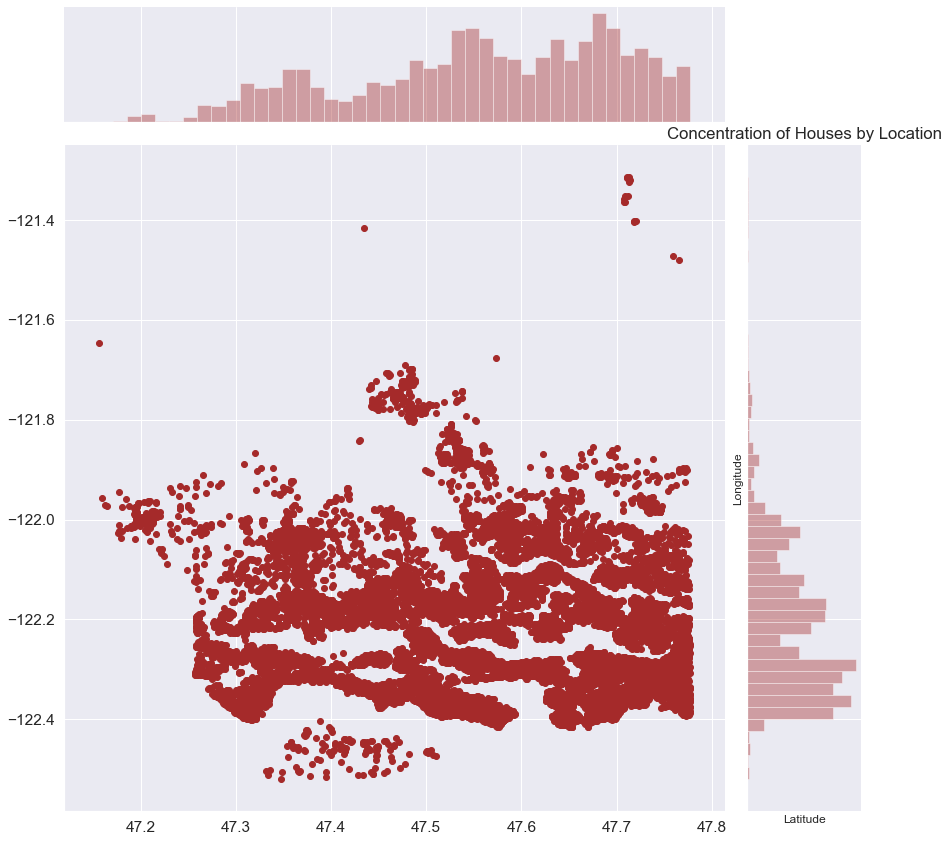

In [87]:
plt.figure(figsize=(18,10))

sns.jointplot(x=kc.lat.values, y=kc.long.values, size=12,color='brown')
plt.ylabel('Longitude', fontsize=12)
plt.xlabel('Latitude', fontsize=12)
plt.title("Concentration of Houses by Location")
sns.despine

In [77]:
kc.to_csv('kc_4_fe3',index=False)  